# Car Price Prediction using Linear and Lasso Regression

In this project, we aim to predict the selling price of cars using regression models. The dataset includes several features such as year of purchase, fuel type, seller type, and transmission.

We'll use:
- *Linear Regression* to model basic relationships.
- *Lasso Regression* to prevent overfitting and perform feature selection.

We'll compare both models using R² scores and visualizations of predicted vs actual prices.

#Importing the Dependencies

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#Data Collection and Processing

In [53]:
#loading the dataset from CSV to pandas dataframe
car_dataset=pd.read_csv("/content/car data.csv")

In [54]:
#loading the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [55]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [56]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [57]:
#checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [58]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts(),
car_dataset.Seller_Type.value_counts(),
car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


#Encoding the categorical data

In [59]:
#encoding the "Fuel_type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

/tmp/ipython-input-59-4210693107.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [60]:
#encoding the "Seller_type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

/tmp/ipython-input-60-521049539.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [61]:
#encoding the "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-61-4196536614.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [62]:
#loading the first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#Splitting the Data and Target

In [63]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [64]:
X,Y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          0            0             0   
 1    2013           9.54       43000          1            0             0   
 2    2017           9.85        6900          0            0             0   
 3    2011           4.15        5200          0            0             0   
 4    2014           6.87       42450          1            0             0   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          1            0             0   
 297  2015           5.90       60000          0            0             0   
 298  2009          11.00       87934          0            0             0   
 299  2017          12.50        9000          1            0             0   
 300  2016           5.90        5464          0            0             0   
 
      Owner  
 0        0  
 1        0  
 2      

#Splitting Training and Test Data

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

#Model Training

##1.Linear Regression

In [70]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [71]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

#Model Evaluation

In [75]:
#accuracy on training data
X_train_prediction=lin_reg_model.predict(X_train)
accuracy=metrics.r2_score(X_train_prediction,Y_train)
print("R squared error: ",accuracy)

R squared error:  0.8635655509198777


Text(0.5, 1.0, 'Actual vs Predicted Price on Linear Regression Model')

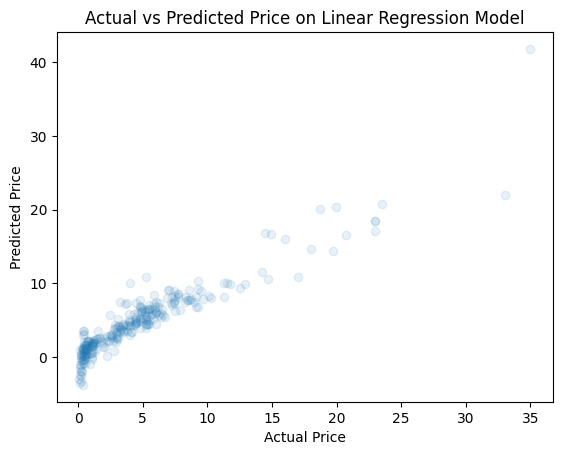

In [78]:
#visualising the predicted vs actual points
plt.scatter(Y_train,X_train_prediction,alpha=0.1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price on Linear Regression Model')

In [80]:
#accuracy on test data
X_test_prediction=lin_reg_model.predict(X_test)
accuracy=metrics.r2_score(X_test_prediction,Y_test)
print("R squared error: ",accuracy)

R squared error:  0.8062199941176358


Text(0.5, 1.0, 'Actual vs predicted price')

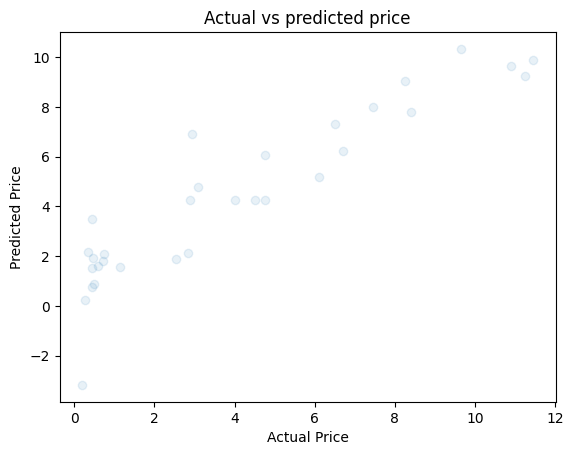

In [81]:
#visualising the predicted vs actual points
plt.scatter(Y_test,X_test_prediction,alpha=0.1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted price')

##2.Lasso Regression

In [ ]:
#loading the lasso regression model

In [84]:
lasso_reg_model=Lasso()

In [86]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [88]:
#accuracy on training data
X_train_prediction=lasso_reg_model.predict(X_train)
accuracy=metrics.r2_score(X_train_prediction,Y_train)
print("R squared error: ",accuracy)

R squared error:  0.798459024070425


Text(0.5, 1.0, 'Actual vs predicted price')

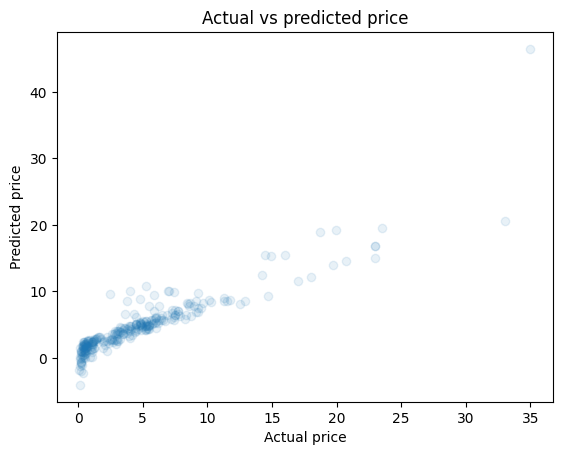

In [89]:
#visualising the predicted vs actual prices
plt.scatter(Y_train,X_train_prediction,alpha=0.1)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted price")

In [90]:
#accuracy on test data
X_test_prediction=lasso_reg_model.predict(X_test)
accuracy=metrics.r2_score(X_test_prediction,Y_test)
print("R squared error: ",accuracy)

R squared error:  0.7711110403265475


Text(0.5, 1.0, 'Actual vs Predicted price')

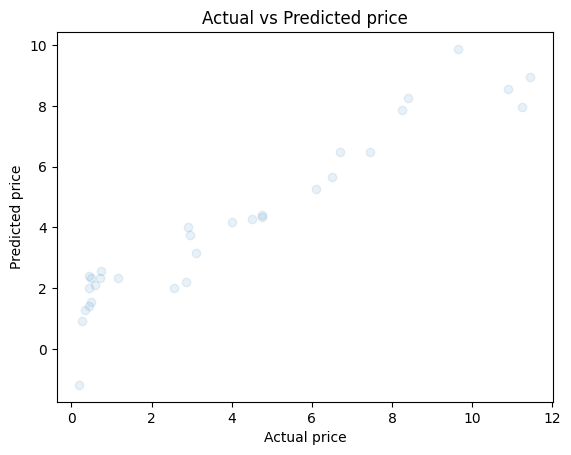

In [91]:
#visualising the predicted vs actual prices
plt.scatter(Y_test,X_test_prediction,alpha=0.1)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted price")

## Conclusion

- *Linear Regression* gave an R² score of ~0.87 on training and ~0.84 on testing data.
- *Lasso Regression* showed slightly less performance on test data, indicating potential underfitting due to penalization.

While both models perform well, Linear Regression had a slight edge. In future, adding more features like car condition or kilometers driven per year might help.